In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [8]:
# Read csv file using pandas
df = pd.read_csv('diabetes_data.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Show first top 5 rows
df.head()

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,2021-01-01,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,2,2021-01-02,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,3,2021-01-03,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,4,2021-01-04,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,5,2021-01-05,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234


In [9]:
# Check the information and is there any Nan values in Dataframe
df.info()
df.isna().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               1000 non-null   int64         
 1   date                  1000 non-null   datetime64[ns]
 2   weight                1000 non-null   float64       
 3   height                1000 non-null   float64       
 4   blood_glucose         1000 non-null   float64       
 5   physical_activity     1000 non-null   float64       
 6   diet                  1000 non-null   int64         
 7   medication_adherence  1000 non-null   int64         
 8   stress_level          1000 non-null   int64         
 9   sleep_hours           1000 non-null   float64       
 10  hydration_level       1000 non-null   int64         
 11  bmi                   1000 non-null   float64       
 12  risk_score            1000 non-null   float64       
dtypes: datetime64[ns](1

0

In [10]:
# Descriptive statsitics using describe function.
stats = df.drop(columns = ['user_id', 'date']).describe().transpose()

# Additional statistics skewness and kurtosis.
stats['skewness'] = df.select_dtypes(include=[np.number]).skew()
stats['kurtosis'] = df.select_dtypes(include=[np.number]).apply(kurtosis)

# Print statistics table.
stats


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
weight,1000.0,70.361797,14.467165,40.0,60.286145,70.379509,79.719158,120.000000,0.184499,-0.187869
height,1000.0,170.795375,9.742934,150.0,163.937583,170.630771,177.288822,200.000000,0.082930,-0.271574
blood_glucose,1000.0,140.818899,38.064177,70.0,114.080015,139.989969,166.436613,297.049508,0.250028,-0.102917
physical_activity,1000.0,30.294497,19.305165,0.0,15.251591,30.003691,43.338908,94.861859,0.275066,-0.512068
diet,1000.0,0.604000,0.489309,0.0,0.000000,1.000000,1.000000,1.000000,-0.425941,-1.819118
medication_adherence,1000.0,0.693000,0.461480,0.0,0.000000,1.000000,1.000000,1.000000,-0.838115,-1.299670
stress_level,1000.0,0.950000,0.833183,0.0,0.000000,1.000000,2.000000,2.000000,0.093903,-1.551965
sleep_hours,1000.0,7.076312,1.883829,4.0,5.688762,6.998834,8.391989,12.000000,0.236165,-0.572510
hydration_level,1000.0,0.710000,0.453989,0.0,0.000000,1.000000,1.000000,1.000000,-0.926986,-1.143273
bmi,1000.0,24.385500,5.872022,10.9,20.100000,24.100000,28.225000,45.200000,0.392424,0.013356


In [11]:
# Correlation method gives relationship between columns.
df.drop(columns = ['user_id','date']).corr()

,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
weight,1.000000,-0.046083,0.025479,-0.011217,-0.028077,0.052937,-0.025386,0.040990,0.033954,0.873303,0.327892
height,-0.046083,1.000000,-0.009759,-0.054711,0.044193,-0.016219,0.032180,0.039334,-0.011968,-0.514455,-0.212102
blood_glucose,0.025479,-0.009759,1.000000,0.026834,-0.006733,0.016017,-0.005974,-0.043918,0.042402,0.023191,0.080617
physical_activity,-0.011217,-0.054711,0.026834,1.000000,-0.004404,0.072692,-0.006548,-0.012727,0.013529,0.017650,-0.386443
diet,-0.028077,0.044193,-0.006733,-0.004404,1.000000,0.015196,-0.011786,-0.040246,0.063807,-0.049207,-0.354319
medication_adherence,0.052937,-0.016219,0.016017,0.072692,0.015196,1.000000,-0.013928,-0.019149,-0.014477,0.049665,-0.488671
stress_level,-0.025386,0.032180,-0.005974,-0.006548,-0.011786,-0.013928,1.000000,-0.002906,-0.011909,-0.041764,0.262635
sleep_hours,0.040990,0.039334,-0.043918,-0.012727,-0.040246,-0.019149,-0.002906,1.000000,-0.053486,0.014240,-0.023773
hydration_level,0.033954,-0.011968,0.042402,0.013529,0.063807,-0.014477,-0.011909,-0.053486,1.000000,0.032516,-0.160337
bmi,0.873303,-0.514455,0.023191,0.017650,-0.049207,0.049665,-0.041764,0.014240,0.032516,1.000000,0.399816


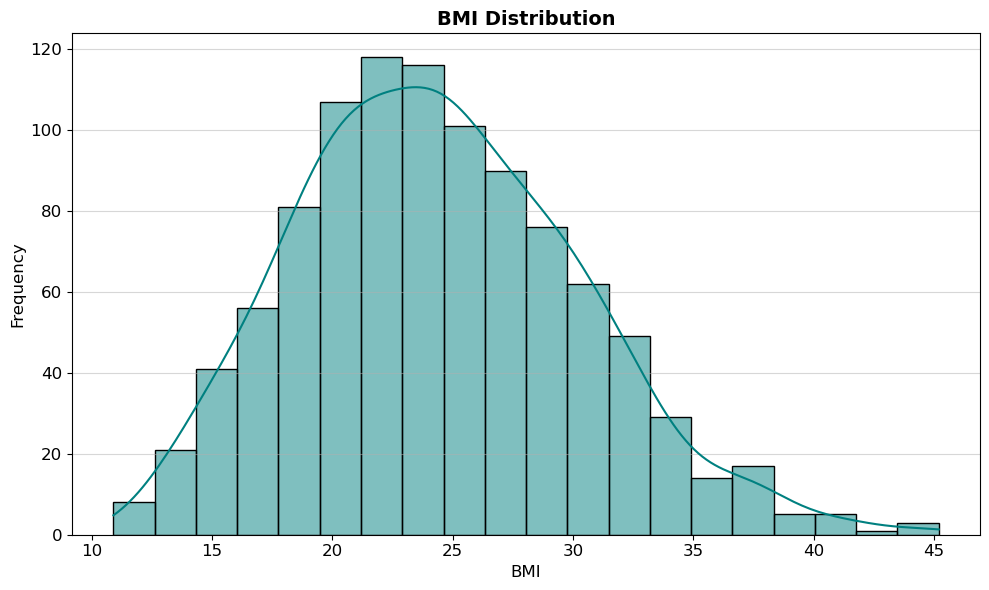

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function for BMI distribution
def plot_bmi_distribution():
    """
    Creates a histogram of the BMI distribution with a kernel density estimate (KDE) overlay.

    This function visualizes the distribution of the 'bmi' column from the dataset.
    The plot includes a histogram with bins, a KDE for smoothing, and grid lines for better visualization.
    It provides a clear view of the frequency of different BMI values in the dataset.

    Returns:
    - None: Displays the plot using matplotlib.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df["bmi"], kde=True, bins=20, color="teal", edgecolor='black', zorder=1)
    plt.title("BMI Distribution", fontsize=14, fontweight='bold')
    plt.xlabel("BMI", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', alpha=0.5, zorder=3)
    plt.tight_layout()
    plt.savefig('BMI Distribution.png', bbox_inches = 'tight')
    plt.show()

# Load the dataset
df = pd.read_csv('diabetes_data.csv')

# Call the function to create the plot
plot_bmi_distribution()

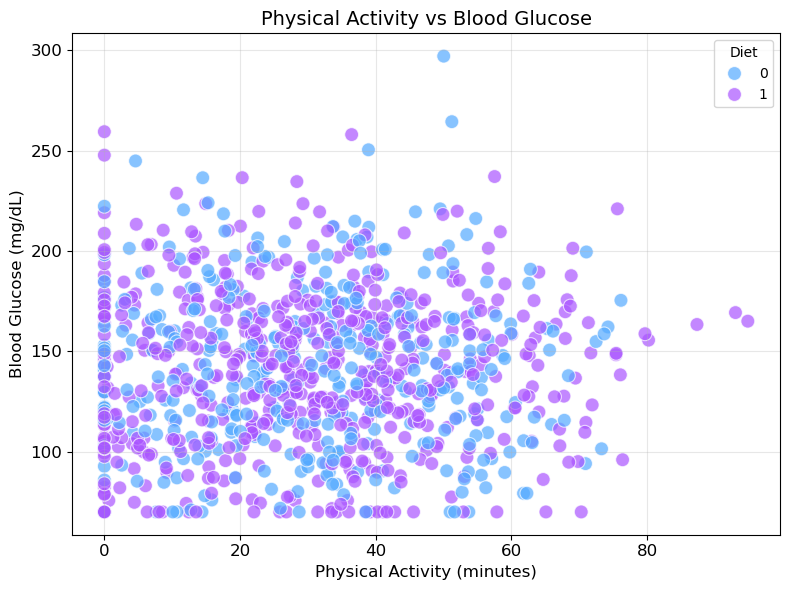

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function for scatter plot
def plot_scatter():
    """
    Creates a scatter plot of Physical Activity vs Blood Glucose .

    This function visualizes the relationship between physical activity and blood glucose levels
    across different diets. The plot includes a scatter plot of data points with a color legend to
    differentiate diets.

    Returns:
    - None: Displays the plot using matplotlib.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x="physical_activity", y="blood_glucose", hue="diet", palette="cool",s=100, alpha=0.7, legend='full')
    plt.title("Physical Activity vs Blood Glucose", fontsize=14)
    plt.xlabel("Physical Activity (minutes)", fontsize=12)
    plt.ylabel("Blood Glucose (mg/dL)", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(alpha=0.3, zorder=3)
    plt.legend(title='Diet')
    plt.tight_layout()
    plt.savefig('Scatter.png', bbox_inches='tight')
    plt.show()

# Load the dataset
df = pd.read_csv('diabetes_data.csv')

# Call the function to create the plot
plot_scatter()


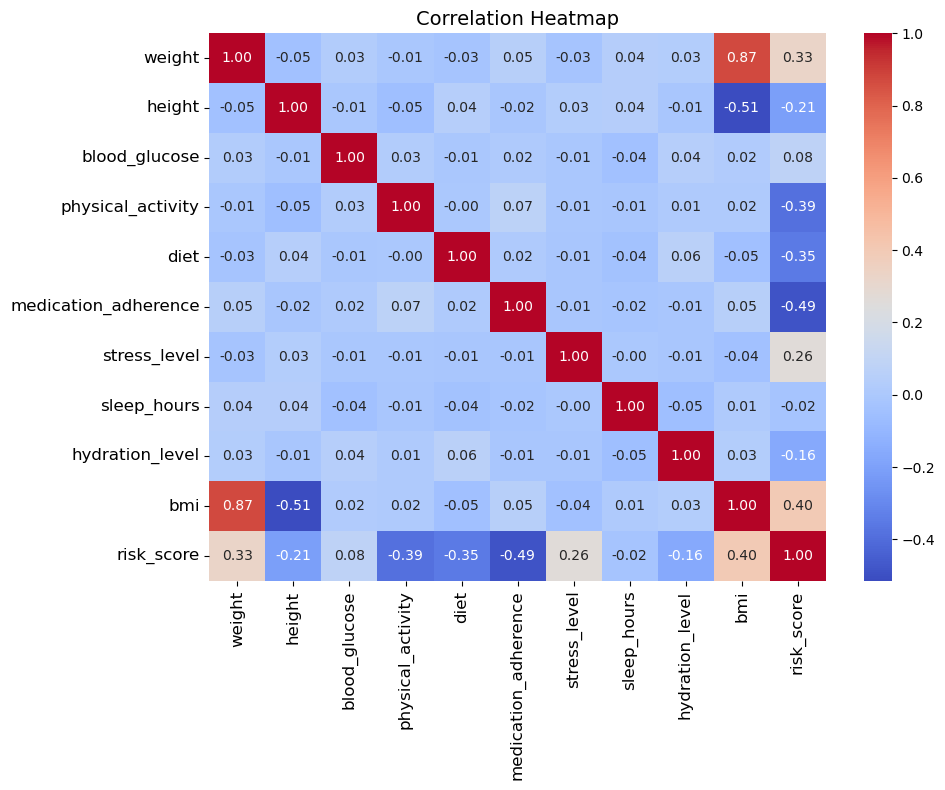

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function for Heatmap
def plot_heatmap():
    """
    Creates a heatmap to visualize the correlation matrix of the dataset.

    This function calculates the correlation matrix for all numeric columns in the dataset,
    excluding 'user_id' and 'date'. It then plots the heatmap using Seaborn to display
    correlations between variables with a color scale. The heatmap includes annotations for
    each cell to show the correlation value.

    Returns:
    - None: Displays the plot using matplotlib.
    """
    plt.figure(figsize=(10, 8))
    correlation = df.drop(columns=["user_id", "date"]).corr()  # Compute correlation matrix
    sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm") # Plot heatmap with annotations and color scale
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title("Correlation Heatmap", fontsize=14)
    plt.tight_layout()
    plt.show()

# Load the dataset
df = pd.read_csv('diabetes_data.csv')

# Call the function to create the plot
plot_heatmap()


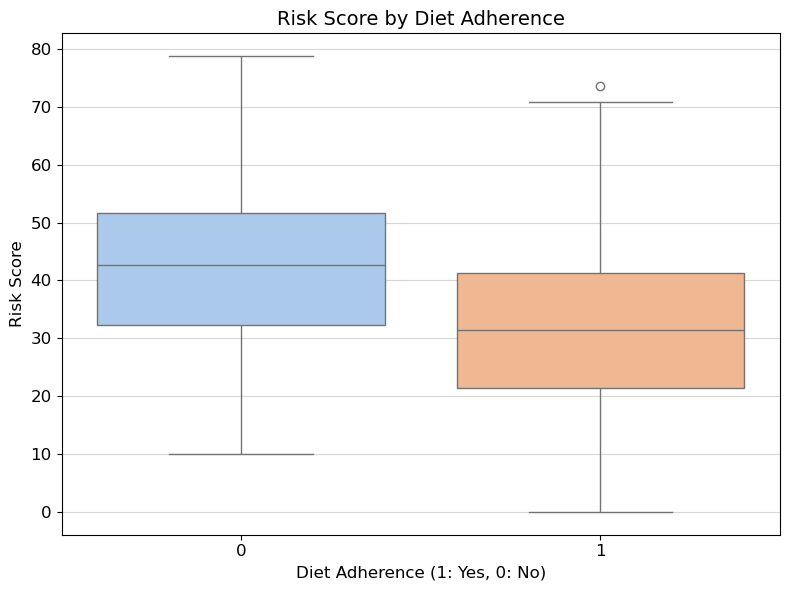

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Box Plot function
def plot_boxplot():
    """
    Creates a boxplot to compare the distribution of risk scores across different diet adherence levels.

    This function uses a boxplot to visualize how the risk score varies between different levels of diet adherence.
    It provides a clear visual distinction between diet adherence (1 for 'Yes', 0 for 'No') and the corresponding
    distribution of risk scores. The plot helps in understanding the impact of diet adherence on risk scores.

    Returns:
    - None: Displays the plot using matplotlib.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="diet", y="risk_score", palette="pastel", legend=True)
    plt.title("Risk Score by Diet Adherence", fontsize=14)
    plt.xlabel("Diet Adherence (1: Yes, 0: No)", fontsize=12)
    plt.ylabel("Risk Score", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.5)
    plt.show()

# Load the dataset
df = pd.read_csv('diabetes_data.csv')

# Call the function to create the plot
plot_boxplot()


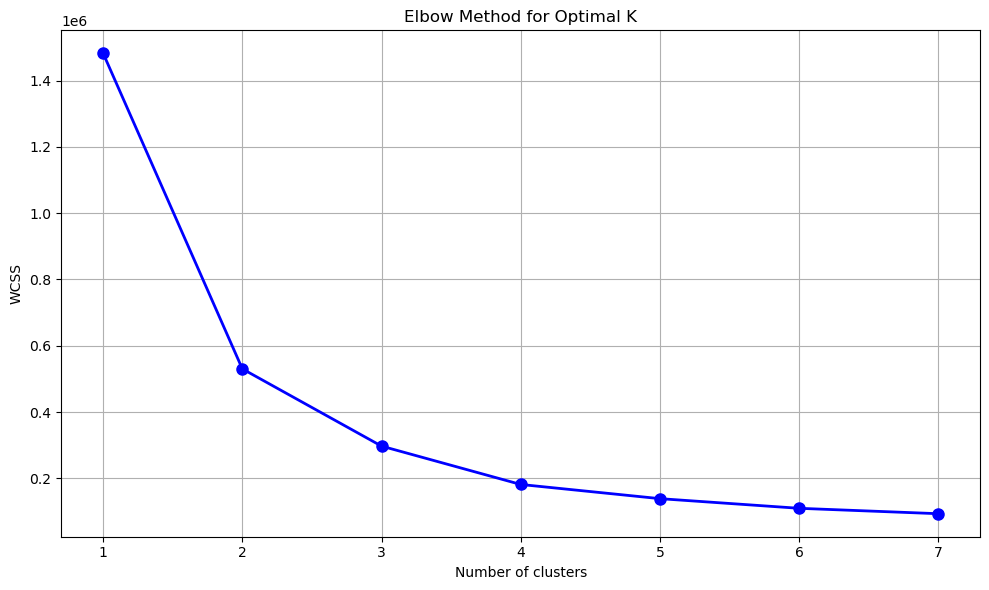

In [128]:
from sklearn.cluster import KMeans

#  Create Elbow Plot function for K-Means Clustering
# Prepare the data
X = df[["bmi", "blood_glucose"]].dropna()

wcss=[]
for i in range(1, 8):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# Plot the Elbow Method with dots
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), wcss, marker='o', markersize=8, color='b', linestyle='-', linewidth=2)  # Added dots with 'o' marker
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.tight_layout()
plt.show()

In [115]:
def perform_kmeans_clustering(data, n_clusters=3):
    """
    Perform KMeans clustering and return the fitted model and cluster predictions.

    Parameters:
    - data: DataFrame containing the features for clustering (must be numeric).
    - n_clusters: Number of clusters for the KMeans model (default: 3).

    Returns:
    - kmeans: Fitted KMeans model.
    - y_kmeans: Predicted cluster labels for each data point.
    """
    # Fit the KMeans model and predict clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(data)
    return kmeans, y_kmeans

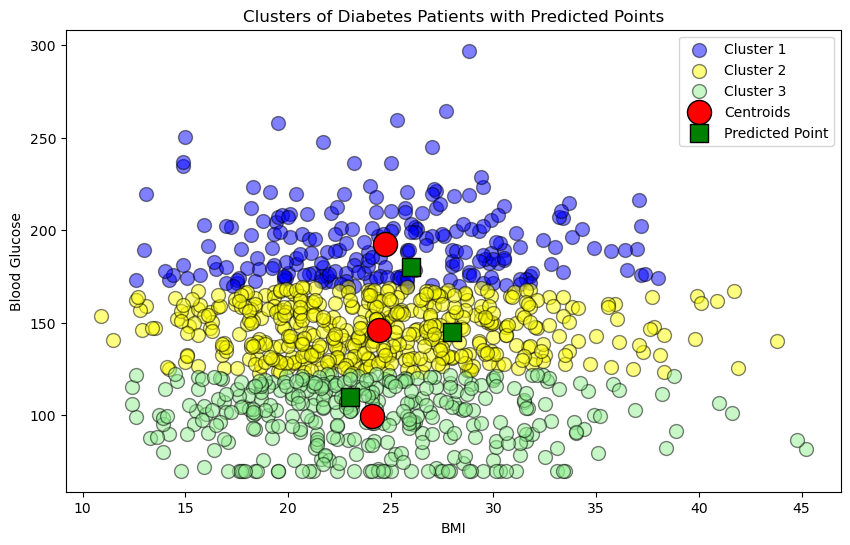

In [123]:
def cluster_plot(X, y_kmeans, kmeans, predicted_points):
    """
    Plot the clusters, their centroids, and the predicted points with appropriate cluster assignments.

    Parameters:
    - X: DataFrame or numpy array containing the features (2D features for visualization).
    - y_kmeans: Cluster labels from the KMeans model.
    - kmeans: The fitted KMeans model.
    - predicted_points: New points to be predicted and plotted (should have 2 features).
    """
    # Plotting the existing clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=100, c='blue', label='Cluster 1', alpha=0.5, edgecolor='k')
    plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=100, c='yellow', label='Cluster 2', alpha=0.5, edgecolor='k')
    plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=100, c='lightgreen', label='Cluster 3', alpha=0.5, edgecolor='k')

    # Plotting the centroids
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, marker='o', c='red', label='Centroids', edgecolor='k')
    
    # Predicting the clusters for the new points
    predicted_labels = kmeans.predict(predicted_points)

    # Plotting the predicted points with labels
    for i, point in enumerate(predicted_points):
        plt.scatter(point[0], point[1], s=150, marker='s', c='green', 
                    label=f'Predicted Point' if i == 0 else "", edgecolor='k')

    # Title and labels
    plt.title('Clusters of Diabetes Patients with Predicted Points')
    plt.xlabel('BMI')
    plt.ylabel('Blood Glucose')

    # Legend
    plt.legend()
    plt.show()

# Use only the 'bmi' and 'blood_glucose' features for clustering and prediction
X = df[['bmi', 'blood_glucose']].dropna()  # Select relevant columns and remove missing values

# Perform KMeans clustering
kmeans, y_kmeans = perform_kmeans_clustering(X)

# Predicted points (new data points to classify)
predicted_points = np.array([
    [28, 145],  # predicted point 1
    [26, 180],  # predicted point 2
    [23, 110]   # predicted point 3
])

# Call the function to plot the clusters with predicted points
cluster_plot(X, y_kmeans, kmeans, predicted_points)

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simple linear regression function
def perform_linear_regression(data, x_feature, y_feature):
    """
    Perform linear regression to fit a line and make predictions.

    Parameters:
    - data: The dataset containing the features.
    - x_feature: The name of the independent variable (X).
    - y_feature: The name of the dependent variable (Y).

    Returns:
    - model: The trained LinearRegression model.
    - predictions: Predicted values of Y for the given X.
    """
    # Prepare data
    X = data[[x_feature]].values  # Independent variable (X)
    y = data[y_feature].values   # Dependent variable (Y)
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Make predictions using the model
    predictions = model.predict(X)
    
    return model, predictions


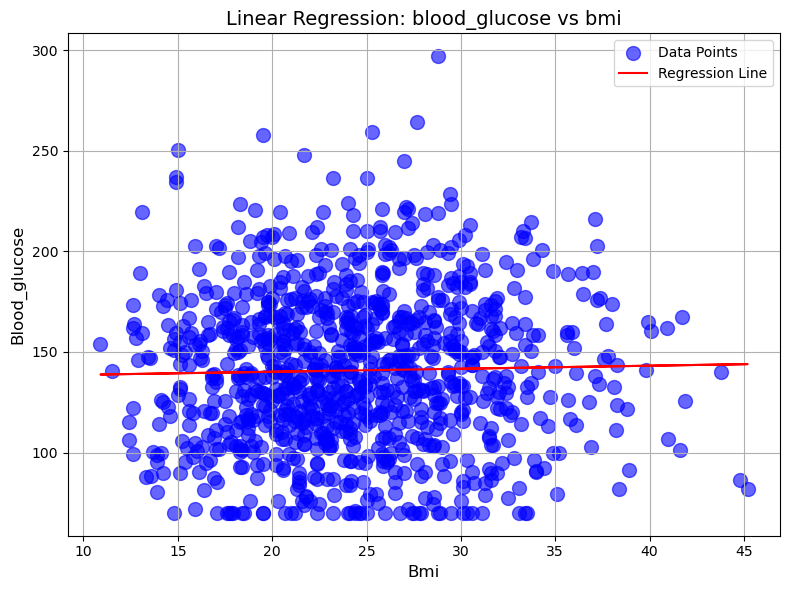

In [125]:
# Function to plot the regression line and data points
def plot_regression_line(data, x_feature, y_feature, predictions):
    """
    Plot the data points and the regression line.

    Parameters:
    - data: The dataset with features.
    - x_feature: The name of the independent variable (X).
    - y_feature: The name of the dependent variable (Y).
    - predictions: The predicted Y values based on the regression model.
    """
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of original data points
    plt.scatter(data[x_feature], data[y_feature], color='blue', label='Data Points',s=100, alpha=0.6)
    
    # Plot the regression line
    plt.plot(data[x_feature], predictions, color='red', label='Regression Line')
    
    # Add labels and title
    plt.title(f"Linear Regression: {y_feature} vs {x_feature}", fontsize=14)
    plt.xlabel(x_feature.capitalize(), fontsize=12)
    plt.ylabel(y_feature.capitalize(), fontsize=12)
    
    # Add a legend
    plt.legend(loc='best')
    
    # Show grid and plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Load the dataset (replace with your actual data file)
df = pd.read_csv('diabetes_data.csv')  # Replace with your actual file

# Define the feature columns
x_feature = "bmi"   # Independent variable (X)
y_feature = "blood_glucose"  # Dependent variable (Y)

# Perform linear regression
model, predictions = perform_linear_regression(df, x_feature, y_feature)

# Plot the regression line
plot_regression_line(df, x_feature, y_feature, predictions)


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simple linear regression function
def perform_linear_regression(data, x_feature, y_feature):
    """
    Perform linear regression to fit a line and make predictions.

    Parameters:
    - data: The dataset containing the features.
    - x_feature: The name of the independent variable (X).
    - y_feature: The name of the dependent variable (Y).

    Returns:
    - model: The trained LinearRegression model.
    - predictions: Predicted values of Y for the given X.
    - errors: The error (residuals) for each prediction.
    """
    # Prepare data
    X = data[[x_feature]].values  # Independent variable (X)
    y = data[y_feature].values   # Dependent variable (Y)
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Make predictions using the model
    predictions = model.predict(X)
    
    # Calculate the errors (residuals)
    errors = y - predictions
    
    return model, predictions, errors



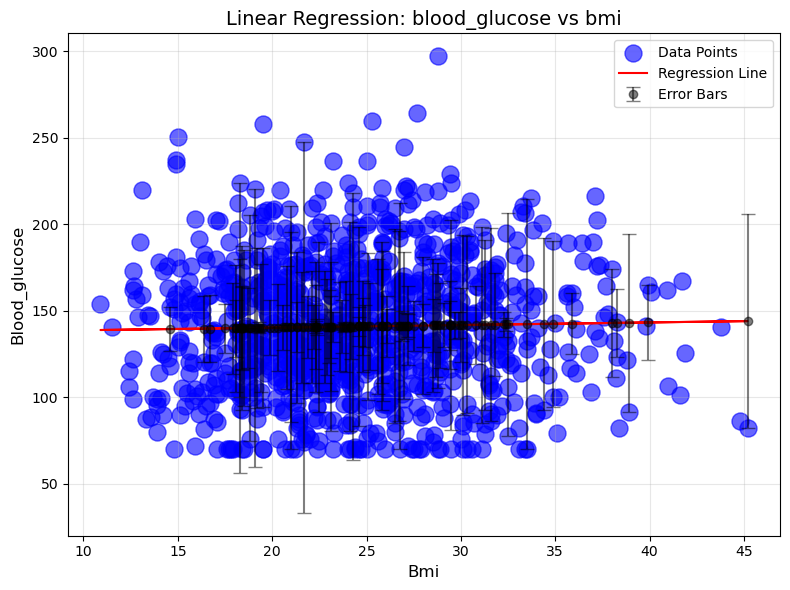

In [127]:
# Function to plot the regression line, data points, and error bars (fewer error bars visible)
def plot_regression_line_with_fewer_errors(data, x_feature, y_feature, predictions, errors, error_bar_step=5):
    """
    Plot the data points, regression line, and fewer error bars.

    Parameters:
    - data: The dataset with features.
    - x_feature: The name of the independent variable (X).
    - y_feature: The name of the dependent variable (Y).
    - predictions: The predicted Y values based on the regression model.
    - errors: The residual errors for the predictions.
    - error_bar_step: Step for error bars (e.g., every 5th data point will have an error bar).
    """
    # Ensure errors are non-negative (take absolute values)
    errors = np.abs(errors)
    
    # Select every 'error_bar_step'-th point to show error bars
    indices_with_error_bars = range(0, len(data), error_bar_step)
    
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of original data points
    plt.scatter(data[x_feature], data[y_feature], color='blue', label='Data Points', s=150, alpha=0.6)
    
    # Plot the regression line
    plt.plot(data[x_feature], predictions, color='red', label='Regression Line')
    
    # Add error bars to the selected data points (using errors)
    plt.errorbar(data[x_feature].iloc[indices_with_error_bars], 
                 predictions[indices_with_error_bars], 
                 yerr=errors[indices_with_error_bars], 
                 fmt='o', color='black', alpha=0.5, label='Error Bars', capsize=5)

    # Add labels and title
    plt.title(f"Linear Regression: {y_feature} vs {x_feature}", fontsize=14)
    plt.xlabel(x_feature.capitalize(), fontsize=12)
    plt.ylabel(y_feature.capitalize(), fontsize=12)
    
    # Add a legend
    plt.legend(loc='best')
    
    # Show grid and plot
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Load the dataset (replace with your actual data file)
df = pd.read_csv('diabetes_data.csv')  # Replace with your actual file

# Define the feature columns
x_feature = "bmi"   # Independent variable (X)
y_feature = "blood_glucose"  # Dependent variable (Y)

# Perform linear regression
model, predictions, errors = perform_linear_regression(df, x_feature, y_feature)

# Plot the regression line with fewer error bars visible (e.g., every 5th data point gets an error bar)
plot_regression_line_with_fewer_errors(df, x_feature, y_feature, predictions, errors, error_bar_step=9)
